**Import libraries**

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Download Bitcoin, Gold, Oil and dollar datasets

In [2]:
btc_data = yf.download("BTC-USD", start = 2022-1-1)
gold_data= yf.download("GOLD", start = 2022-1-1)
oil_data = yf.download("OIL", start = 2022-1-1)
dxy_data = yf.download('DX-Y.NYB', start = 2022-1-1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Make Plots for each one in subplots

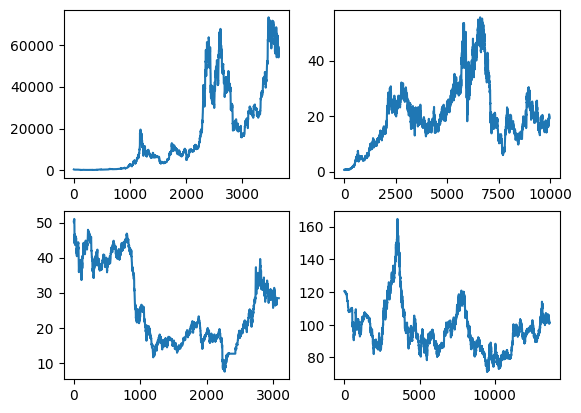

In [10]:
btc_range = np.arange(len(btc_data))
plt.subplot(2, 2, 1)
plt.plot(btc_range,btc_data['Close'])

gold_range = np.arange(len(gold_data))
plt.subplot(2, 2, 2)
plt.plot(gold_range,gold_data['Close'])

oil_range = np.arange(len(oil_data))
plt.subplot(2, 2, 3)
plt.plot(oil_range,oil_data['Close'])

dxy_range = np.arange(len(dxy_data))
plt.subplot(2, 2, 4)
plt.plot(dxy_range, dxy_data['Close'])

Make DataFrame

In [4]:
df = pd.DataFrame()
df['dxy'] = dxy_data['Close']
df['gold'] = gold_data['Close']
df['oil'] = oil_data['Close']
df['btc'] = btc_data['Close']

Cleaning DataSet

In [5]:
df = df.dropna()

Fit DataSets

In [15]:
scaler = MinMaxScaler()

d1 = scaler.fit_transform(dxy_data['Close'].values.reshape(-1,1))
d2 = scaler.fit_transform(btc_data['Close'].values.reshape(-1,1))
d3 = scaler.fit_transform(oil_data['Close'].values.reshape(-1,1))
d4 = scaler.fit_transform(gold_data['Close'].values.reshape(-1,1))

New Subplot

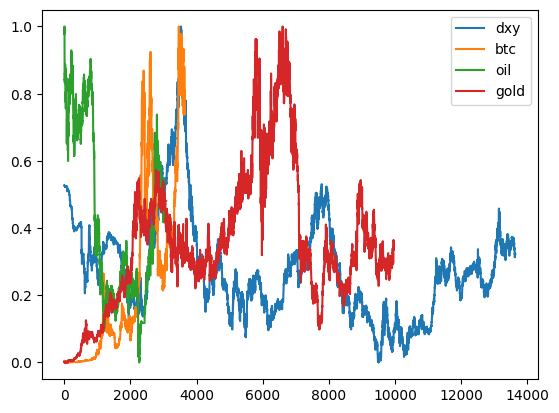

In [16]:
plt.plot(dxy_range, d1, label = 'dxy')
plt.plot(btc_range,d2, label = 'btc')
plt.plot(oil_range,d3, label = 'oil')
plt.plot(gold_range,d4, label = 'gold')

plt.legend()
plt.show()

PairPlot

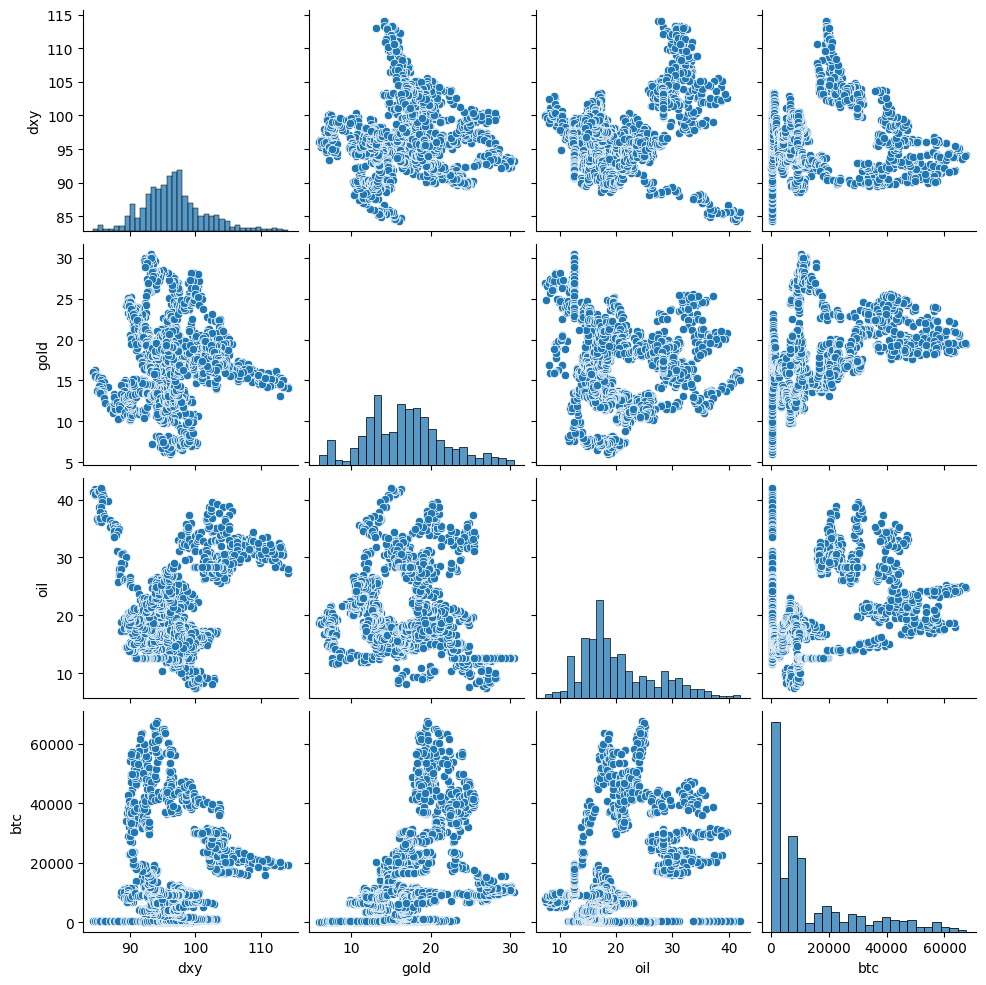

In [17]:
hf = sns.pairplot(df)
plt.show()

Gold & Dxy : Negitive 
Btc & Dxy : Unknown
Oil & Gold : Weak Positive

In [22]:
df2 = pd.DataFrame()


d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)
d4 = pd.DataFrame(d4)


df2['dxy'] = dxy_data['Close']
df2['gold'] = gold_data['Close']
df2['oil'] = oil_data['Close']
df2['btc'] = btc_data['Close']

df2.index = pd.to_datetime(df2.index)
df2.dropna() # drop NaN Values

scaler = MinMaxScaler()
df2_scaled = pd.DataFrame(scaler.fit_transform(df2), index=df2.index, columns=df2.columns)

df2_monthly = df2_scaled.groupby(pd.Grouper(freq='M')).mean()

HeatMap

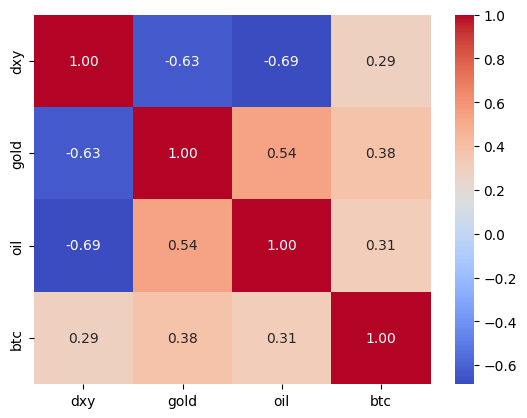

In [23]:
hg = sns.heatmap(df2_monthly.corr(), annot=True, fmt = ".2f", cmap="coolwarm")


plt.show()